In [4]:
import scipy.io
import h5py
import numpy as np
import pandas as pd
from ecgdetectors import Detectors
import matplotlib.pyplot as plt
from scipy import signal

path = 'data/X1001.csv'
data = pd.read_csv(path)

ecg = data['ECG']
current_fs = 1000
target_fs = 50
ecg_down = signal.resample(ecg, int(len(ecg) * target_fs / current_fs))
# bcg = downsample(bcg,1000, 50)
range(len(data))

range(0, 299000)

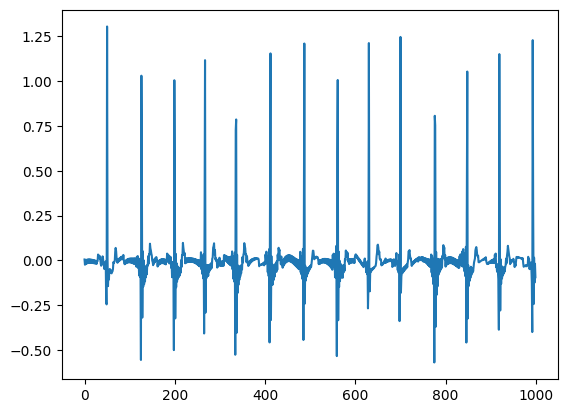

In [72]:
plt.plot(ecg_down[0:1000])

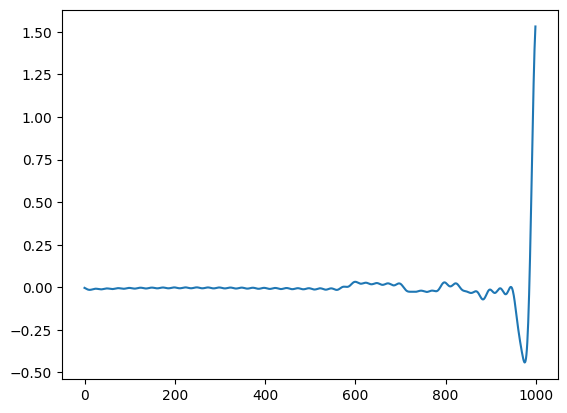

In [73]:
plt.plot(ecg[0:1000])

In [56]:
def downsample(data, initial_hz, target_hz):
    """Downsample data from initial_hz to target_hz.
    Args:
        data: 1D numpy array of data to downsample.
        initial_hz: Initial sampling rate of data.
        target_hz: Target sampling rate of data.
    Returns:
        downsampled_data: 1D numpy array of downsampled data.
    """

    # Calculate the number of samples to skip
    skip = int(initial_hz / target_hz)

    # Downsample the data
    downsampled_data = data[::skip]

    return downsampled_data


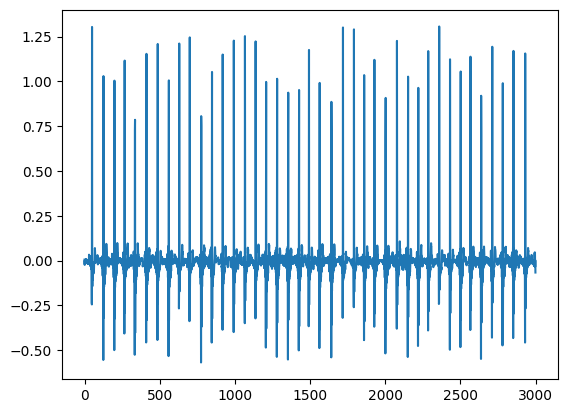

In [74]:
plt.plot(ecg_down[0:3000])

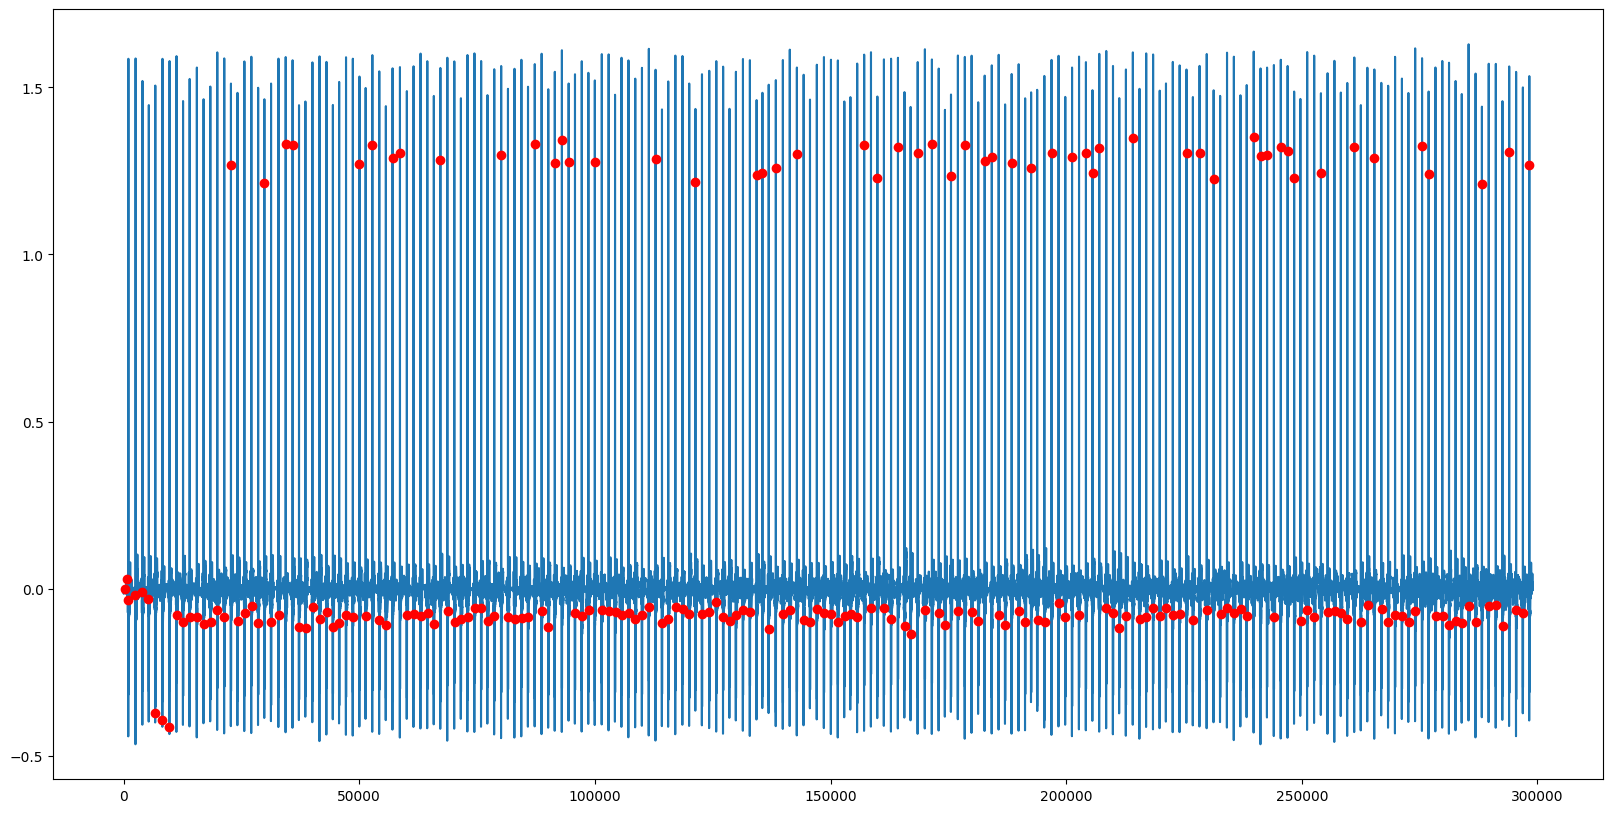

In [101]:
detectors = Detectors(1000) # Initialize detectors object
r_peaks = detectors.pan_tompkins_detector(ecg) # Detect R peaks

plt.figure(figsize=(20,10))
plt.plot(ecg)
temp = ecg
y = ecg[r_peaks]
plt.plot(r_peaks, y, 'ro')

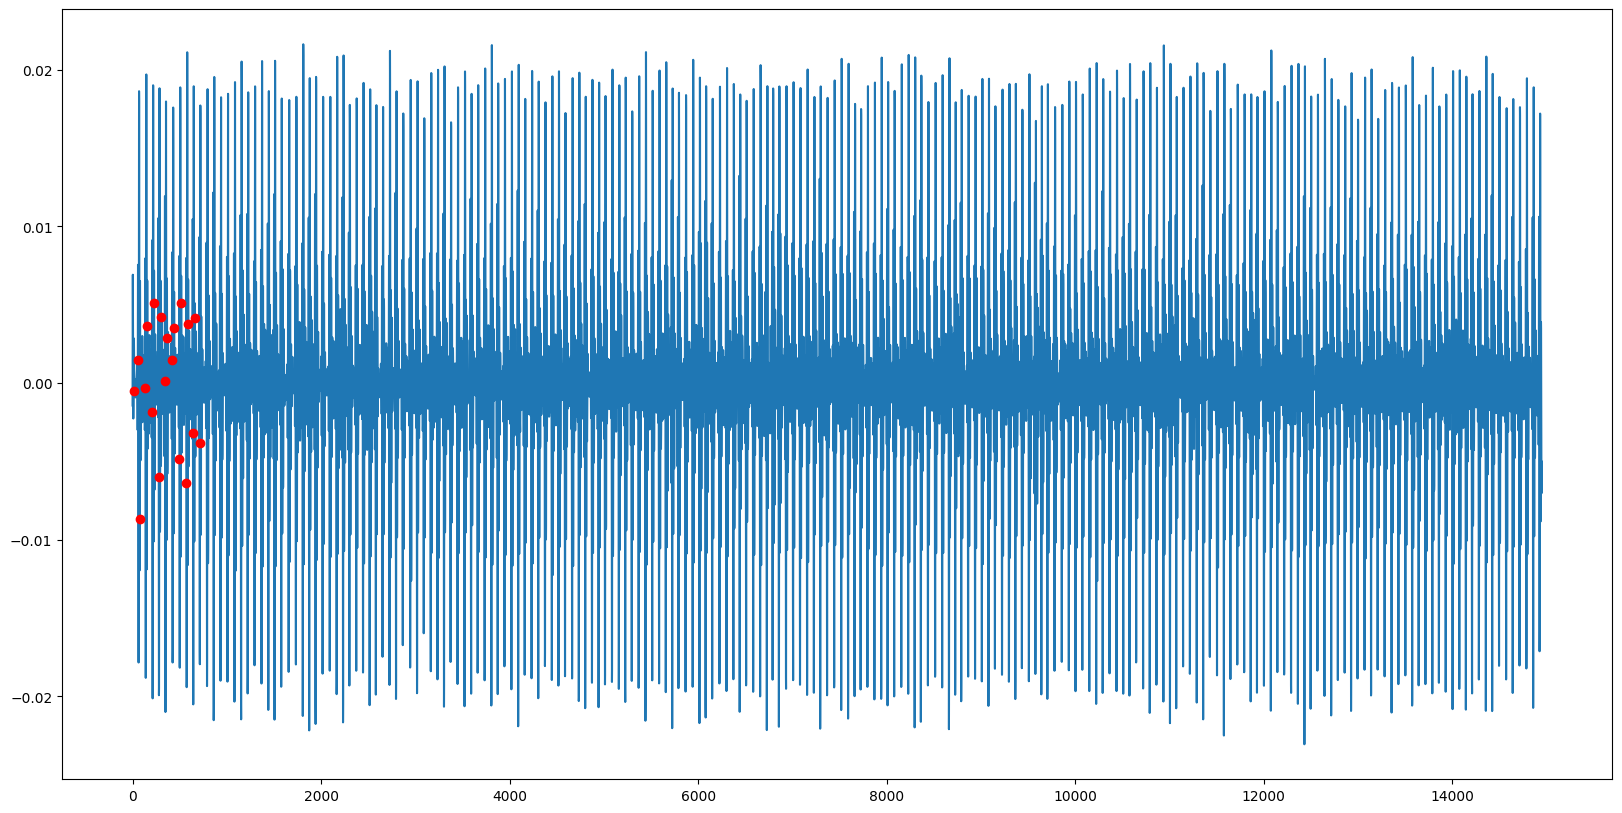

In [81]:
bcg = data['LC_BCG2']
bcg = signal.resample(bcg, int(len(bcg) * target_fs / current_fs))
j_peaks = detectors.pan_tompkins_detector(bcg) # Detect R peaks
plt.figure(figsize=(20,10))

plt.plot(bcg[0:20000])
plt.plot(j_peaks[0:20], bcg[j_peaks[0:20]], 'ro')


In [77]:
def heart_rate(peaks):
    diff_sample = peaks[-1] - peaks[0] + 1
    t_N = diff_sample / 50
    heartRate = (len(peaks) - 1) / t_N * 60
    return heartRate

In [91]:
import hrv

# Calculate the heart rate
help(hrv)

Help on module hrv:

NAME
    hrv

DESCRIPTION
    A collection of heartrate variability algorithms for
    both the timedomain and frequency domain.
    
    Copyright (C) 2019 Luis Howell & Bernd Porr
    GPL GNU GENERAL PUBLIC LICENSE Version 3, 29 June 2007

CLASSES
    builtins.object
        HRV
    
    class HRV(builtins.object)
     |  HRV(sampling_frequency)
     |  
     |  Heartrate variability class which calcualtes the standard HRV
     |  parameters with the help of Python functions and for cross
     |  validation also via the physionet's get_hrv script.
     |  
     |  Methods defined here:
     |  
     |  HR(self, rr_samples)
     |      Calculate heart-rates from R peak samples.
     |      
     |      :param rr_samples: R peak sample locations
     |      :type rr_samples: array_like
     |      :return: Heart-rates in BPM
     |      :rtype: ndarray
     |  
     |  NN20(self, rr_samples)
     |      Calculate NN20, the number of pairs of successive NNs that dif

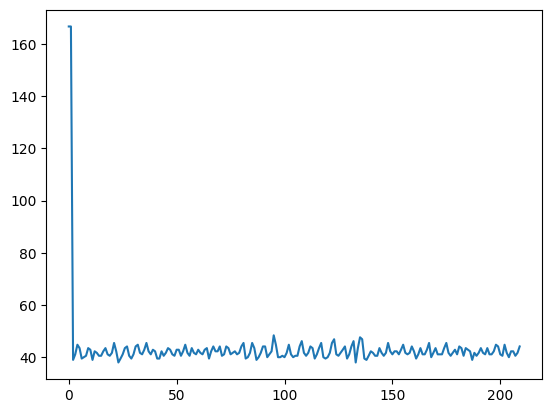

In [96]:
import hrv

obj = hrv.HRV(50)
heart = obj.HR(r_peaks)
plt.plot(heart)

In [103]:
ecg_hr = compute_rate(r_peaks)
bcg_hr = heart_rate(j_peaks)

# Plot the mean absolute error
plt.figure(figsize=(20,10))
plt.plot(ecg_hr)
plt.plot(bcg_hr)



TypeError: compute_rate() missing 2 required positional arguments: 'time' and 'mpd'

In [102]:
def compute_rate(beats, time, mpd, indices= None):
    if indices is None:
        indices = detect_peaks(beats, mpd=mpd)
    else:
        #TODO: this needs review
        # get indecies of peaks in beats array
        indices = np.array([i for i, x in enumerate(beats) if x in indices])

    if len(indices) > 1:
        peak_to_peak = []
        for i in range(0, indices.size - 1):
            peak_to_peak = np.append(peak_to_peak, time[indices[i + 1]] - time[indices[i]])
        mean_heart_rate = np.average(peak_to_peak, axis=0)
        bpm_avg = 1000 * (60 / mean_heart_rate)
        return np.round(bpm_avg, decimals=2), indices
    else:
        return 0.0, 0.0